In [1]:
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import pickle
import imageio

### Figure 3B Dice Score Box Plot

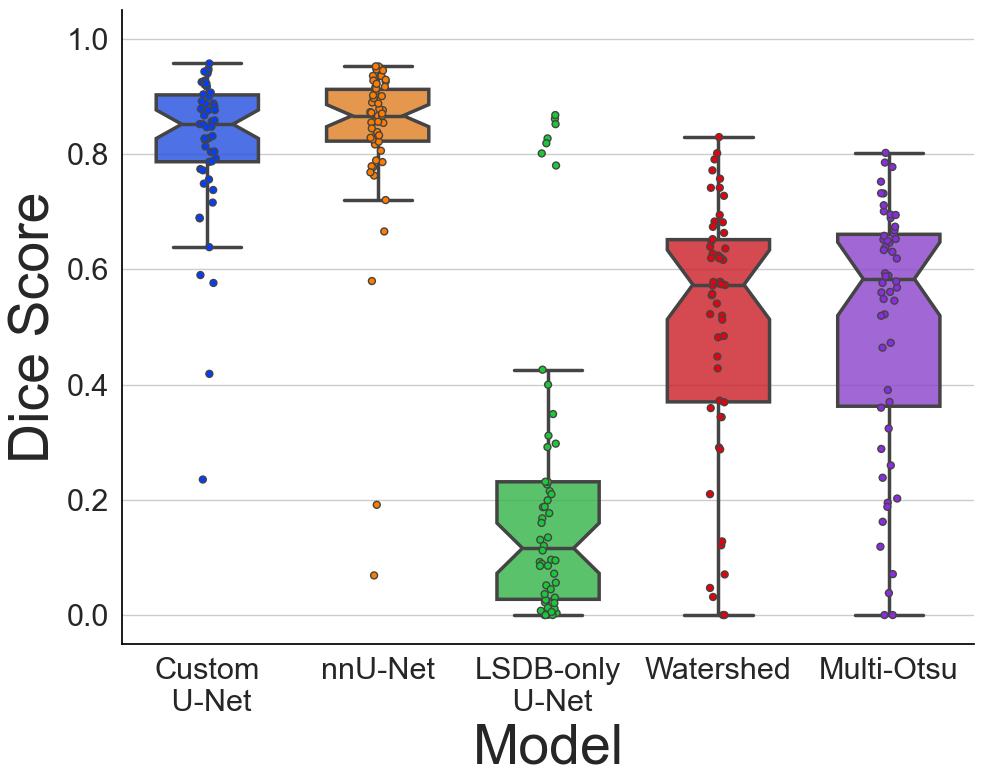

In [2]:
# fixed terms
metrics = ['Dice Score', 'MultiClass Dice Score', 'True Negatives', 'False Positives', 'False Negatives','True Positives']
data_folder = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/quantitative_evaluation/full_test_set_eval'
output_folder = '/Users/matt/Desktop'

sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'Helvetica'
title_fontsize = 20
axis_fontsize = 40
tick_fontsize = 22
label_fontsize = 22
metric_of_interest = 'Dice Score' # just dice score is required

# images corresponding to each dataset
dataset_titles = ['Matthew Gels 1', 'Matthew Gels 2', 'Nathan Gels', 'LSDB Gels', 'Quantitation Gels']
mg_1 = ['8', '13', '38', '62', '81', '105', '108', '114', '128', '132', '140', '143', '146', '161', '168', '179', '183',
        '187', '205', '214', '220', '230', '235', '242', '251', '257', '263', '292', '307', '312']
mg_2 = ['0', '7', '11', '32', '49', '176', '201', '216', 'mg2_214']
ng = ['UVP01944May172019', 'UVP01947May172019', 'UVP01949May172019', 'UVP02164June252019']
lsdb = ['C50-4', 'C30194', 'C51416', 'C53007', 'C60248', 'C61344', 'E864']
quantg = ['1_Thermo', '8_Thermo', '25_NEB', '29_NEB']
selection = mg_1 + mg_2 + ng + quantg + lsdb # just put in all gels from the test set

# loading and gathering datasets
datasets = {}
for m in metrics:
    datasets[m] = pd.read_csv(os.path.join(data_folder, 'metrics', m + '.csv'), index_col=0)

# custom name for each column/model
models = datasets[m].columns
custom_names = ['Old U-Net', 'Custom\n U-Net', 'Custom U-Net\n (Extended)', 'LSDB-only\n U-Net',
                'LSDB-only U-Net\n (Extended)', 'Watershed', 'Multi-Otsu', 'nnU-Net (Extended)', 'nnU-Net']

# actual data for plotting
zoom_slice = [1, 8, 3, 5, 6]
tick_points = [0, 0.2, 0.4, 0.6, 0.8, 1]
zoom_names = [custom_names[i] for i in zoom_slice]
zoom_columns = [models[i] for i in zoom_slice]
target_df = datasets[metric_of_interest].iloc[:, zoom_slice]

sns.set(style="whitegrid")
sel_palette = 'bright'

# box plots for selective figures

fig, ax = plt.subplots(figsize=(10,8))

# [x.set_linewidth(2.5) for x in ax.spines.values()]  # makes border thicker

# Set the color of the spines to black
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

melted_df_models = pd.melt(target_df.loc[selection].reset_index(), id_vars=['Image'], var_name='model', value_name='value')

boxplot = sns.boxplot(x='model', y='value', data=melted_df_models, showfliers=False,hue='model',legend=False,widths=[0.6],
                      notch=True, palette=sel_palette, linewidth=2.5)

for patch in boxplot.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))
    
sns.stripplot(x='model', y='value', data=melted_df_models, jitter=0.05, legend=False, dodge=False, hue='model',
          alpha=1.0, marker="o", palette=sel_palette, linewidth=1.0)

# plt.title('All Gels (n=54)', fontsize=title_fontsize)  # seems to overlap with figure, making tiny for now then will replace in post
# Set font size for ticks
boxplot.tick_params(axis='x', labelsize=tick_fontsize)
boxplot.tick_params(axis='y', labelsize=tick_fontsize)

# Add labels and title
plt.xlabel('Model', fontsize=axis_fontsize)
plt.ylabel('Dice Score', fontsize=axis_fontsize)
plt.yticks(tick_points, fontsize=tick_fontsize)
ax.set_ylim(-0.05, 1.05)

ax.set_xticks(ax.get_xticks())  # just to silence annoying warning
boxplot.set_xticklabels(zoom_names, fontsize=label_fontsize)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, f'dice_score_test_set_boxplot.pdf'), dpi=300)
plt.show()

In [3]:
# export for source data file
target_df.loc[selection].reset_index().to_excel('/Users/matt/Desktop/figure_3b_box_plot_source_data.xlsx', index=False)

### Figure 3B Violin Plot

#### Need to generate pickle file by running generation_of_band_level_statistics_on_test_set_figure_3.py first.

For gel 8, unet_dec_21 identified 100.00% of bands, with an average accuracy of 0.855
For gel 8, nnunet_final_fold_0 identified 83.33% of bands, with an average accuracy of 0.658
For gel 8, unet_dec_21_lsdb_only identified 26.67% of bands, with an average accuracy of 0.023
For gel 8, watershed identified 20.00% of bands, with an average accuracy of 0.188
For gel 8, multiotsu identified 33.33% of bands, with an average accuracy of 0.194
----
For gel 13, unet_dec_21 identified 81.58% of bands, with an average accuracy of 0.653
For gel 13, nnunet_final_fold_0 identified 92.11% of bands, with an average accuracy of 0.752
For gel 13, unet_dec_21_lsdb_only identified 47.37% of bands, with an average accuracy of 0.154
For gel 13, watershed identified 15.79% of bands, with an average accuracy of 0.064
For gel 13, multiotsu identified 15.79% of bands, with an average accuracy of 0.066
----
For gel 38, unet_dec_21 identified 90.79% of bands, with an average accuracy of 0.740
For gel 38, nnunet_f

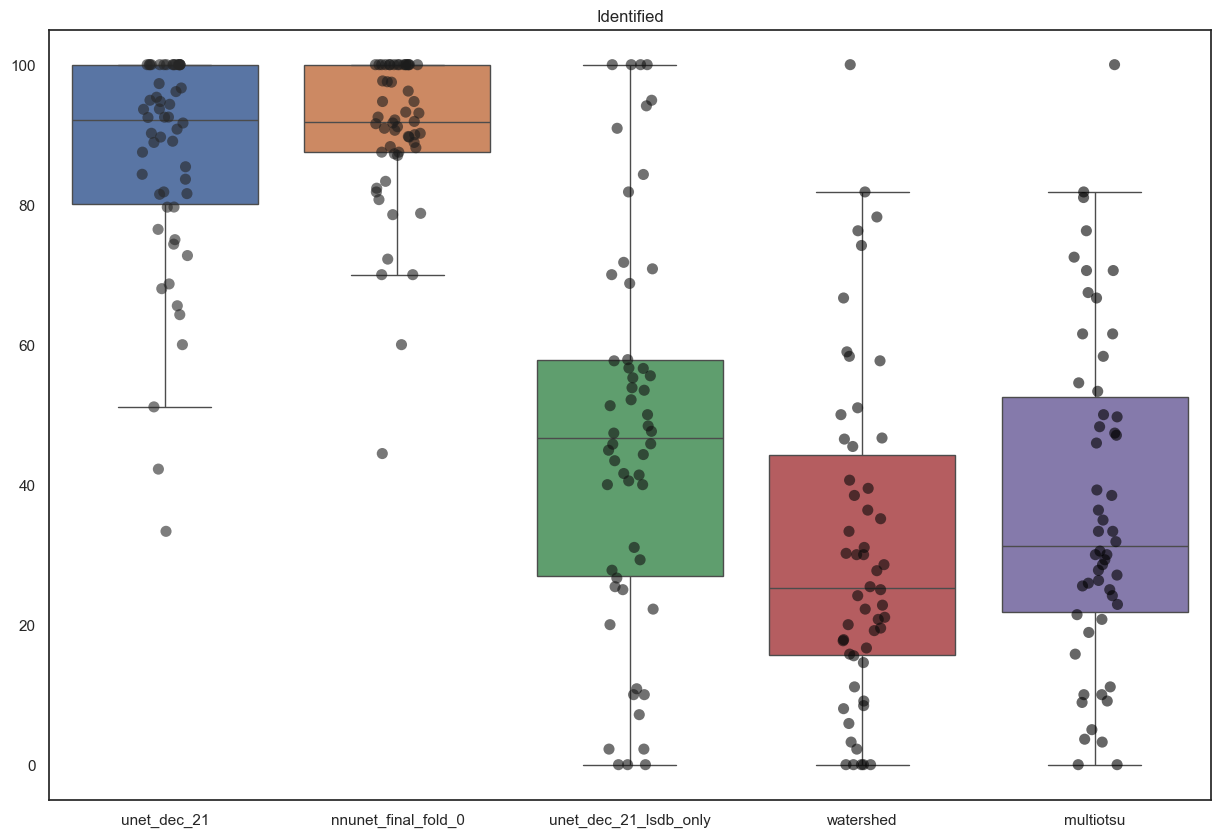

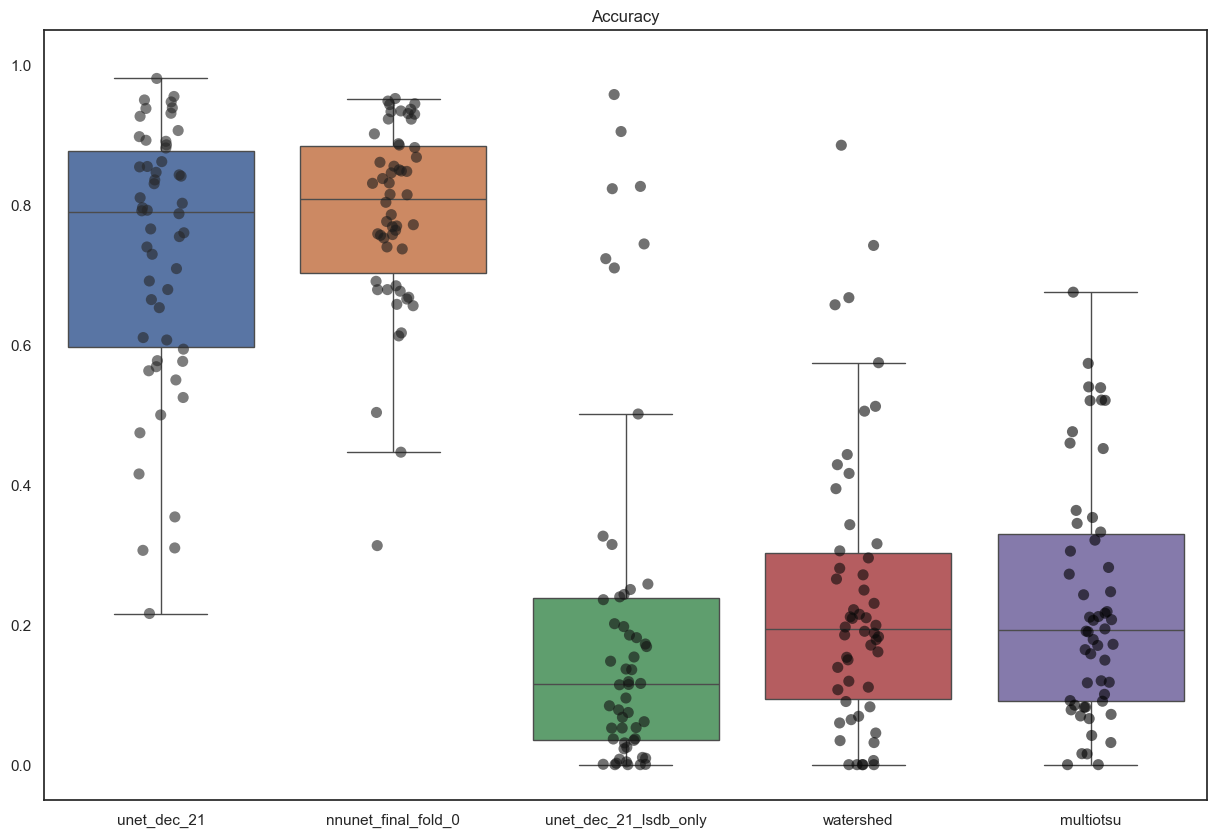

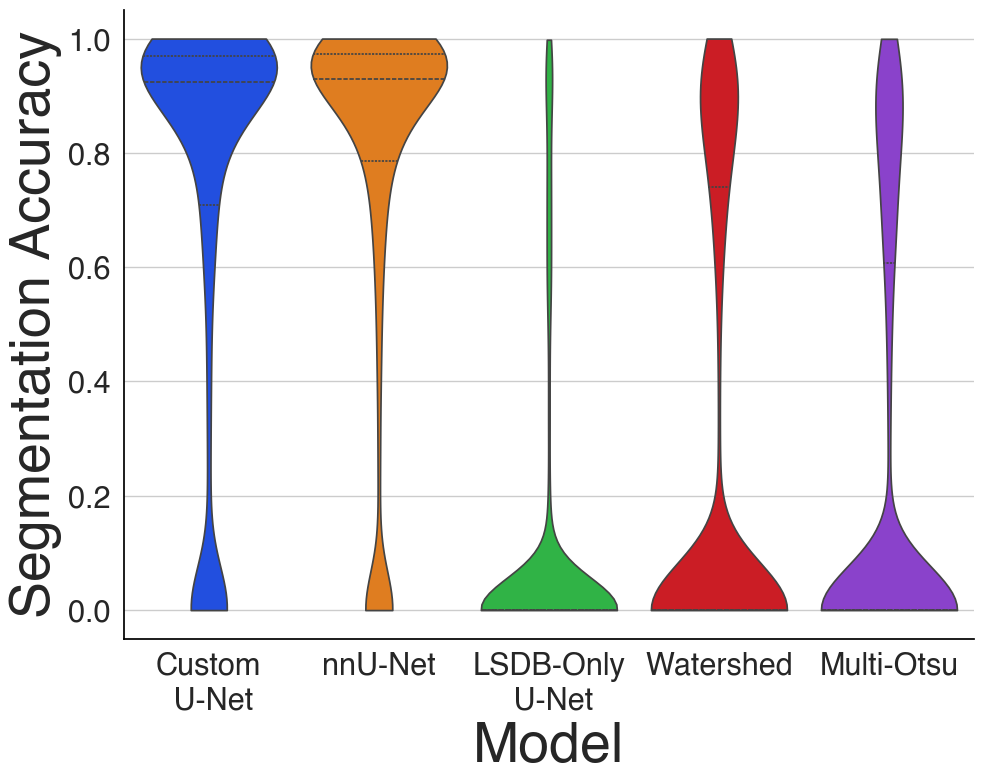

In [5]:
import os
from collections import defaultdict

import pandas as pd
import pickle
import matplotlib.pyplot as plt
import numpy as np
import imageio
import seaborn as sns

in_folder = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/quantitative_evaluation/full_test_set_eval/metrics/band_level_accuracy_analysis'
eval_models = ['unet_dec_21', 'nnunet_final_fold_0', 'unet_dec_21_lsdb_only', 'watershed', 'multiotsu']
mg_1 = ['8', '13', '38', '62', '81', '105', '108', '114', '128', '132', '140', '143', '146', '161', '168', '179', '183',
        '187', '205', '214', '220', '230', '235', '242', '251', '257', '263', '292', '307', '312']
mg_2 = ['0', '7', '11', '32', '49', '176', '201', '216', 'mg2_214']
ng = ['UVP01944May172019', 'UVP01947May172019', 'UVP01949May172019', 'UVP02164June252019']
lsdb = ['C50-4', 'C30194', 'C51416', 'C53007', 'C60248', 'C61344', 'E864']
quantg = ['1_Thermo', '8_Thermo', '25_NEB', '29_NEB']

gel_level_dict = pickle.load(open(os.path.join(in_folder, 'gel_level_stats_no_ceiling.pkl'), 'rb'))

ceiling = False

for dataset_combo, data_name in zip([mg_1 + mg_2 + ng + quantg + lsdb], ['All Gels (n=54)']):
    model_level_accuracy_average = [0] * 5
    model_level_id_average = [0] * 5

    dataset_level_id_average = defaultdict(list)
    dataset_level_error_average = defaultdict(list)
    dataset_level_full_accuracy_list = defaultdict(list)

    for key, val in gel_level_dict.items():
        if key not in dataset_combo:
            continue
        for model_ind, model in enumerate(eval_models):
            id_list = val['identified'][model_ind]
            accuracy_list = [max(1 - x, 0) for x in val['error'][model_ind]]
            dataset_level_full_accuracy_list[model].extend(
                [max(1 - x, 0) if val['multi_band'][model_ind][ind] is False else 0 for ind, x in enumerate(val['error'][model_ind])])
            if sum(id_list) == 0:
                percent_identified = 0
                average_accuracy_for_identified = 0
            else:
                percent_identified = (sum(id_list) / len(id_list)) * 100
                if ceiling:
                    average_accuracy_for_identified = sum([err for id, err in zip(id_list, accuracy_list) if id]) / sum(
                        id_list)
                else:
                    average_accuracy_for_identified = sum(accuracy_list) / len(accuracy_list)

            print(
                f'For gel {key}, {model} identified {percent_identified:.2f}% of bands, with an average accuracy of {average_accuracy_for_identified:.3f}')
            model_level_id_average[model_ind] += percent_identified
            model_level_accuracy_average[model_ind] += average_accuracy_for_identified
            dataset_level_id_average[model].append(percent_identified)
            dataset_level_error_average[model].append(average_accuracy_for_identified)
        print('----')
    print('---------')

    model_level_accuracy_average = [x / len(dataset_combo) for x in model_level_accuracy_average]
    model_level_id_average = [x / len(dataset_combo) for x in model_level_id_average]

    print('Final averages:')
    print(model_level_accuracy_average)
    print(model_level_id_average)

    id_dataset = pd.DataFrame.from_dict(dataset_level_id_average)
    accuracy_dataset = pd.DataFrame.from_dict(dataset_level_error_average)

    plt.figure(figsize=(15, 10))
    sns.boxplot(data=id_dataset, showfliers=False)
    sns.stripplot(data=id_dataset, jitter=True, marker="o", palette='dark:black', size=8, alpha=0.6)
    plt.title('Identified')
    # plt.show()

    plt.figure(figsize=(15, 10))
    sns.boxplot(data=accuracy_dataset, showfliers=False)
    sns.stripplot(data=accuracy_dataset, jitter=True, marker="o", palette='dark:black', size=8, alpha=0.6)
    plt.title('Accuracy')
    plt.ylim([-0.05, 1.05])
    # plt.show()

    full_accuracy_dataset = pd.DataFrame.from_dict(dataset_level_full_accuracy_list)
    full_accuracy_dataset.rename(columns={'unet_dec_21': 'Custom\n U-Net',
                                          'nnunet_final_fold_0': 'nnU-Net',
                                          'unet_dec_21_lsdb_only': 'LSDB-Only\n U-Net',
                                          'watershed': 'Watershed',
                                          'multiotsu': 'Multi-Otsu'}, inplace=True)

    sns.set(style="whitegrid")
    plt.rcParams['font.family'] = 'Helvetica'

    fig, ax = plt.subplots(figsize=(10, 8))

    vplot = sns.violinplot(data=full_accuracy_dataset, cut=0,
                           # inner_kws=dict(box_width=10, whis_width=2),
                           palette='bright', inner='quartile')

    # Set the color of the spines to black
    ax.spines['top'].set_color('black')
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.ylabel('Segmentation Accuracy', fontsize=40)
    plt.xlabel('Model', fontsize=40)
    plt.yticks(fontsize=22)
    vplot.tick_params(axis='x', labelsize=22)
    plt.tight_layout()
    plt.savefig('/Users/matt/Desktop/full_gel_level_accuracy_violin.pdf')
    plt.show()


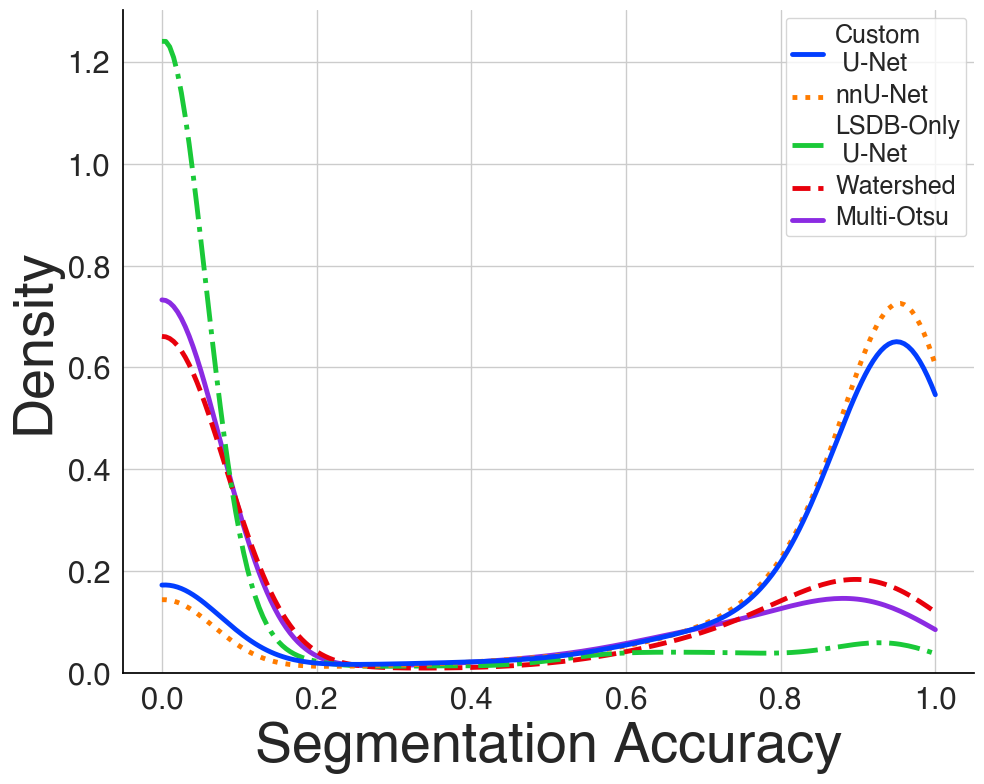

In [127]:
# version 2 of Figure 3C (band-level accuracy)

sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'Helvetica'

fig, ax = plt.subplots(figsize=(10, 8))

kdeplot = sns.kdeplot(data=full_accuracy_dataset, linewidth=3.5, palette='bright', clip=(0,1))
# Ensure a legend exists and customize it
legend = plt.gca().get_legend()  # Get the legend object
if legend is not None:
    for text in legend.get_texts():
        text.set_fontsize(18)  # Set the desired font size
    
# Define different linestyles for each line
linestyles = ['-', '--', '-.', ':', 'solid']

handles = kdeplot.legend_.legend_handles[::-1]

for line, ls, handle in zip(kdeplot.lines, linestyles, handles):
    line.set_linestyle(ls)
    handle.set_ls(ls)

# Set the color of the spines to black
ax.spines['top'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 
plt.xlabel('Segmentation Accuracy', fontsize=40)
plt.ylabel('Density', fontsize=40)
plt.yticks(fontsize=22)
plt.xticks(fontsize=22)

plt.tight_layout()
plt.savefig('/Users/matt/Desktop/full_gel_level_accuracy_density.pdf')
plt.show()



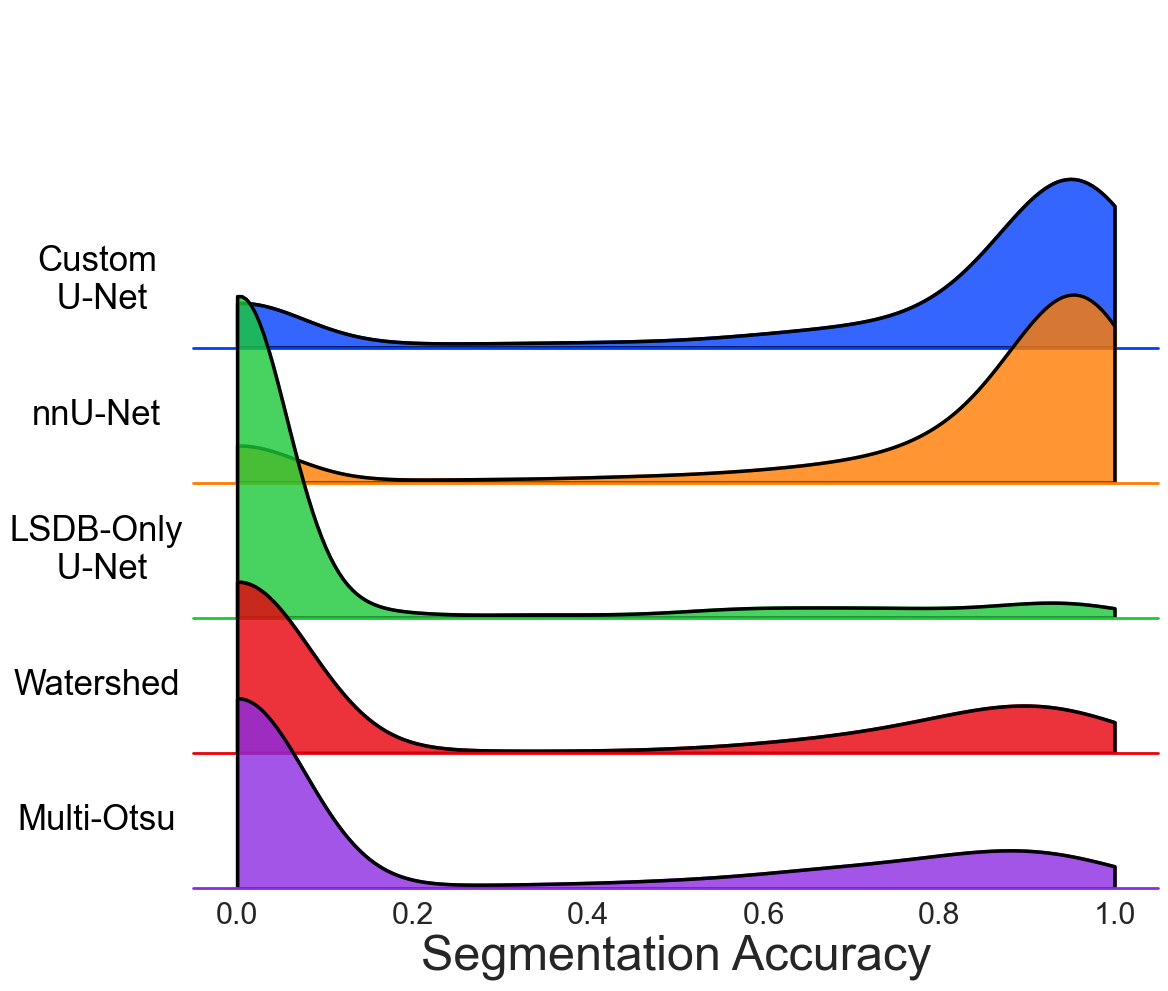

In [6]:
# version 3 of Fig. 3C
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
palette = 'bright'

g = sns.FacetGrid(pd.melt(full_accuracy_dataset), row= 'variable', hue='variable', palette=palette, aspect=6, height=2)

# Draw the densities in a few steps
g.map(sns.kdeplot, "value", clip=(0,1), fill=True, alpha=0.8, linewidth=2.5)
g.map(sns.kdeplot, "value", clip=(0,1), fill=True, alpha=0, color="black", linewidth=2.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.1, .2, label, color='black', fontsize=25,
            ha="center", va="center", transform=ax.transAxes)

g.map(label, "value")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-0.6)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True, right=True, top=True)
plt.xlabel('Segmentation Accuracy', fontsize=35)
plt.xticks(fontsize=22)

# plt.tight_layout()
plt.savefig('/Users/matt/Desktop/ridge_plot_v3.pdf', bbox_inches='tight')

In [7]:
# export for source data file
full_accuracy_dataset.to_excel('/Users/matt/Desktop/figure_3b_density_plot_source_data.xlsx', index=False)

/Users/matt/miniconda3/envs/gelgenie/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/matt/miniconda3/envs/gelgenie/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  func(*plot_args, **plot_kwargs)
/Users/matt/miniconda3/envs/gelgenie/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/matt/miniconda3/envs/gelgenie/lib/python3.10/site-packages/seaborn/axisgrid.py:854: UserWarning

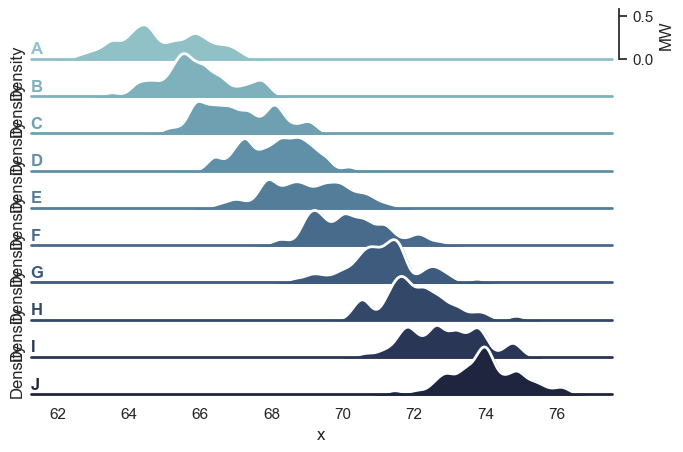

In [138]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

#
# Changes from seaborn example below this point
#

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25, right=0.9)

# Remove axes details that don't play well with overlap
g.set_titles("")
#g.set(yticks=[])
g.despine(bottom=True, left=True, right=False, top=True, offset=5)

for ind, ax in enumerate(g.axes.ravel()):
    if ind==0:  # can use .is_last_row() to show spine on the bottom plot instead
        ax.yaxis.tick_right()
        ax.yaxis.set_label_position("right")
        ax.set_ylabel("MW")
    else:
        ax.spines['right'].set_visible(False)
        [l.set_visible(False) for l in ax.get_yticklabels()]  # necessary because y-axes are shared

### Figure 3D Qualitative Analysis

In [9]:
gg_quality_file = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/quantitative_evaluation/full_test_set_eval/metrics/qualitative_bands_identified.csv'
ga_quality_file = '/Users/matt/Documents/PhD/research_output/Automatic_Gel_Analyzer/quantitative_evaluation/full_test_set_eval/gelanalyzer_projects_for_test_set/qualitative_bands_identified.csv'

gg_qual = pd.read_csv(gg_quality_file)
ga_qual = pd.read_csv(ga_quality_file)
sns.set(style="whitegrid")


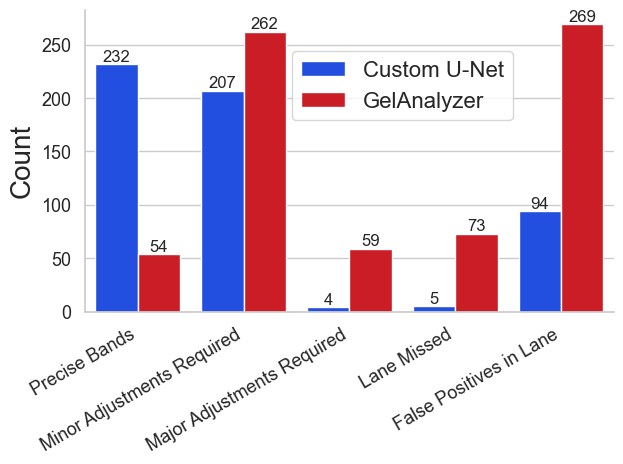

In [10]:

gg_qual_counts = defaultdict(int)
ga_qual_counts = defaultdict(int)

for code in gg_qual[' Lane Codes']:
    for qualcode, newname in zip(['P', 'Bn', 'L', 'Bo', 'M'],['Precise Bands', 'Minor Adjustments Required', 'Lane Width Needs Adjustment','Major Adjustments Required', 'Lane Missed']):
        gg_qual_counts[newname] += code.count(qualcode)
    
for code in ga_qual[' Lane Codes']:
    for qualcode, newname in zip(['P', 'Bn', 'L', 'Bo', 'M'],['Precise Bands', 'Minor Adjustments Required', 'Lane Width Needs Adjustment','Major Adjustments Required', 'Lane Missed']):
        ga_qual_counts[newname] += code.count(qualcode)

ga_qual_counts['Minor Adjustments Required'] += ga_qual_counts['Lane Width Needs Adjustment']
gg_qual_counts['Minor Adjustments Required'] += gg_qual_counts['Lane Width Needs Adjustment']

ga_qual_counts.pop('Lane Width Needs Adjustment', None)
gg_qual_counts.pop('Lane Width Needs Adjustment', None)

gg_qual_counts['False Positives in Lane'] = sum(gg_qual[' Lanes with additional Bands'])   
ga_qual_counts['False Positives in Lane'] = sum(ga_qual[' Lanes with additional Bands'])   

# Convert dictionaries to pandas DataFrames
df1 = pd.DataFrame(list(gg_qual_counts.items()), columns=['Keys', 'GelGenie'])
df2 = pd.DataFrame(list(ga_qual_counts.items()), columns=['Keys', 'GelAnalyzer'])

merged_df = pd.merge(df1, df2, on='Keys')

merged_df = merged_df.rename(columns={'GelGenie': 'Custom U-Net', 'GelAnalyzer': 'GelAnalyzer'})

# Melt the DataFrame to convert it to long format
melted_df = pd.melt(merged_df, id_vars=['Keys'], var_name='Software', value_name='Count')

# Plot using Seaborn
ax = sns.barplot(data=melted_df, x='Keys', y='Count', hue='Software', palette=['#023eff', '#e8000b'])
ax.bar_label(ax.containers[0], fontsize=12);
ax.bar_label(ax.containers[1], fontsize=12);

plt.ylabel('Count', fontsize=20)
plt.xlabel('')
plt.xticks(rotation=30, ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
# for legend text
plt.setp(ax.get_legend().get_texts(), fontsize=30)  
 
# for legend title
# Remove the legend title
plt.legend(title='')
# plt.setp(ax.get_legend().get_title(), fontsize='26') 

sns.move_legend(ax, "upper center", bbox_to_anchor=(0.6, 0.9), fontsize=16)

plt.tight_layout()
plt.savefig('/Users/matt/Desktop/qual_bar_chart.pdf')
plt.show()

In [11]:
# export for source data file
merged_df.to_excel('/Users/matt/Desktop/figure_3d_bar_plot_source_data.xlsx', index=False)

In [4]:
merged_df

,Keys,GelGenie,GelAnalyzer
0,Precise Bands,232,54
1,Minor Adjustments Required,207,262
2,Major Adjustments Required,4,59
3,Lane Missed,5,73
4,False Positives in Lane,94,269
